
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-05-26<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [0]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed May 27 13:06:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

**Connect and authorize google drive with google colab:**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [0]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints	     IMAGES	  requirements.txt
custom_dataset	     log	  tools
detection_custom.py  mnist	  train.py
detection_demo.py    model_data   yolov3
detect_mnist.py      __pycache__  YOLOv3_colab_training.ipynb


**Install all required libraries for our project:**

In [0]:
!pip install -r ./requirements.txt

**Download yolov3.weights if you don't have it:**

In [0]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.2.0
'/device:GPU:0'
```

In [0]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.2.0


'/device:GPU:0'

**Test by loading trained model:**

In [0]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS

yolo = Create_Yolov3(input_size=input_size)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Test by testing detection on original model:**

In [0]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [0]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/1.jpg 650,576,959,749,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/2.jpg 215,190,409,294,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/3.jpg 845,429,932,488,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/4.jpg 71,113,397,220,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/6.jpg 784,493,944,593,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/7.jpg 275,215,463,262,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/8.jpg 323,508,500,609,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/9.jpg 140,177,238,200,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/10.jpg 154,126,315,174,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=754.jpg 506,

**Start training custom model:**

In [0]:
from train import *
tf.keras.backend.clear_session()
main()

Streaming output truncated to the last 5000 lines.
epoch: 3 step:   53/55, lr:0.000100, giou_loss:   1.31, conf_loss:  53.59, prob_loss:   0.17, total_loss:  55.07
epoch: 3 step:   54/55, lr:0.000100, giou_loss:   1.54, conf_loss:  53.63, prob_loss:   0.17, total_loss:  55.34
epoch: 3 step:    0/55, lr:0.000100, giou_loss:   1.51, conf_loss:  52.92, prob_loss:   0.15, total_loss:  54.59
epoch: 3 step:    1/55, lr:0.000100, giou_loss:   1.40, conf_loss:  52.50, prob_loss:   0.17, total_loss:  54.08


giou_val_loss:   1.46, conf_val_loss:  61.38, prob_val_loss:   0.17, total_val_loss:  63.01


epoch: 4 step:    2/55, lr:0.000100, giou_loss:   1.58, conf_loss:  53.04, prob_loss:   0.22, total_loss:  54.84
epoch: 4 step:    3/55, lr:0.000100, giou_loss:   1.30, conf_loss:  51.80, prob_loss:   0.14, total_loss:  53.24
epoch: 4 step:    4/55, lr:0.000100, giou_loss:   1.48, conf_loss:  51.18, prob_loss:   0.15, total_loss:  52.82
epoch: 4 step:    5/55, lr:0.000100, giou_loss:   1.44, conf_l

**Create Yolo v3 custom model and load custom trained weights**

In [0]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

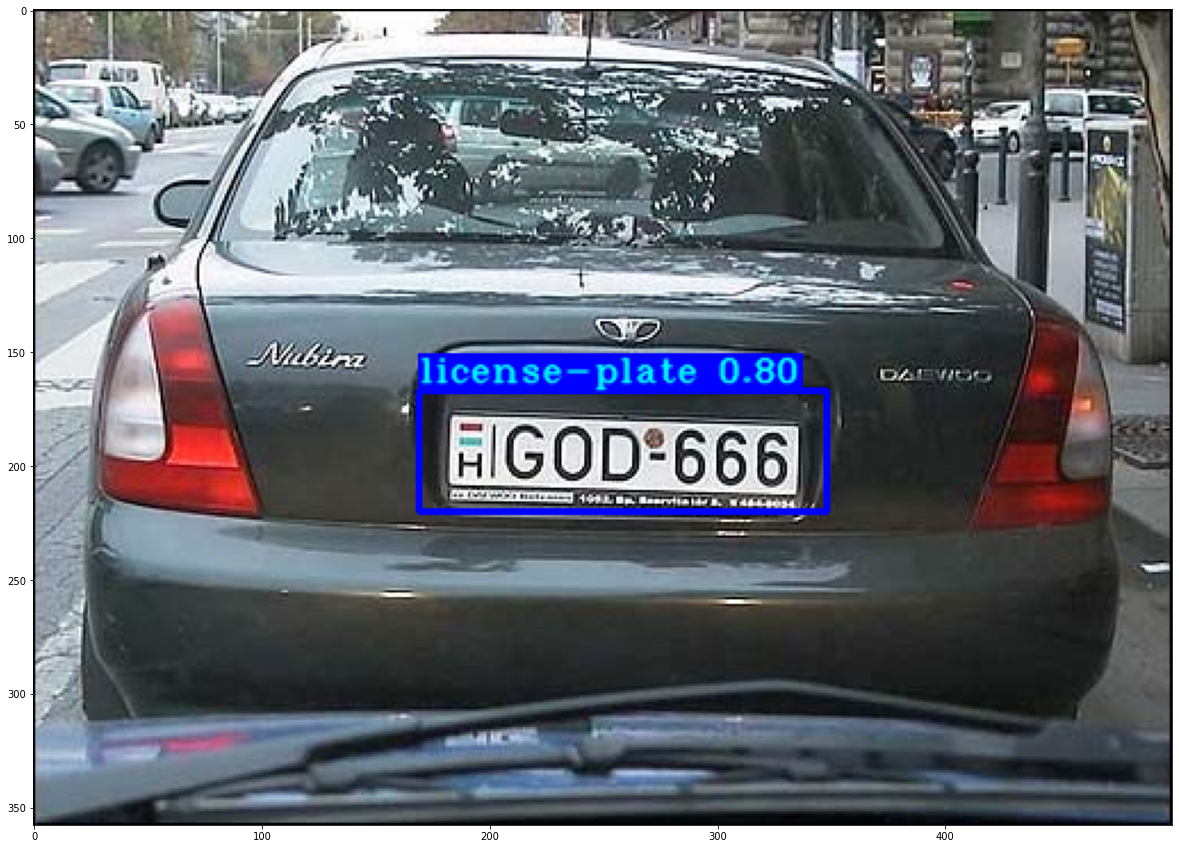

In [0]:
image_path   = "./IMAGES/plate_1.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**